In [1]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('census_20.csv')
df

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,Smith Radial,Grace,Patel,46,Head,Widowed,Female,Petroleum engineer,None,Catholic
1,1,Smith Radial,Ian,Nixon,24,Lodger,Single,Male,Publishing rights manager,None,Christian
2,2,Smith Radial,Frederick,Read,87,Head,Divorced,Male,Retired TEFL teacher,None,Catholic
3,3,Smith Radial,Daniel,Adams,58,Head,Divorced,Male,"Therapist, music",None,Catholic
4,3,Smith Radial,Matthew,Hall,13,Grandson,NaN,Male,Student,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...
10605,1,Page Farm,Leon,Gregory,42,Husband,Married,Male,Passenger transport manager,None,None
10606,1,Page Farm,Sally,Gregory,4,Daughter,NaN,Female,Child,None,NaN
10607,1,Page Farm,Graham,Gregory,1,Son,NaN,Male,Child,None,NaN
10608,1,Page Farm,Toby,Jennings,31,Lodger,Single,Male,Unemployed,None,Christian


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10610 entries, 0 to 10609
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   10610 non-null  int64 
 1   Street                         10610 non-null  object
 2   First Name                     10610 non-null  object
 3   Surname                        10610 non-null  object
 4   Age                            10610 non-null  object
 5   Relationship to Head of House  10610 non-null  object
 6   Marital Status                 7995 non-null   object
 7   Gender                         10610 non-null  object
 8   Occupation                     10610 non-null  object
 9   Infirmity                      10610 non-null  object
 10  Religion                       7928 non-null   object
dtypes: int64(1), object(10)
memory usage: 911.9+ KB


In [4]:
df['Age'].unique()

array(['46', '24', '87', '58', '13', '9', '38', '12', '69', '42', '48',
       '8', '33', '16', '6', '4', '74', '70', '40', '82', '28', '71',
       '72', '86', '84', '34', '5', '2', '47', '20', '39', '23', '30',
       '31', '1', '60', '105', '102', '43', '41', '10', '50', '14', '49',
       '11', '78', '37', '45', '35', '61', '18', '52', '51', '15', '7',
       '65', '27', '73', '59', '54', '17', '36', '63', '3', '62', '21',
       '0', '32', '29', '83', '68', '53', '67', '80', '88', '100', '76',
       '22', '85', '75', '81', '26', '66', '19', '94', '55', '64', '56',
       '44', '57', '25', '89', '77', '79', '97', '95', '98', '104',
       '43.54302670766108', '49.54302670766108', '5.0', '103', ' ', '91',
       '90', '96', '89.33008765095417', '94.33008765095417', '41.0',
       '38.0', '99', '93', '89.2477665064506', '112'], dtype=object)

In [5]:
df[df['Age'] == ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2480,27,Mustard Roads,Stephanie,Brown,,Daughter,NaN,Female,Student,None,NaN
4575,96,Hudson Gateway,Jasmine,Gibson,,Head,Single,Female,Illustrator,None,Catholic
5885,12,Henge Street,John,Harris,,Son,NaN,Male,Student,None,NaN
6746,44,South Avenue,Arthur,Mitchell,,Son,NaN,Male,Student,None,NaN
9900,61,Regent Coves,Susan,Ross,,Daughter,Divorced,Female,"Nurse, children's",None,Christian


In [6]:
df['Age'][df['Occupation']=='Student'] #calculating the average age of students

4        13
5         9
7        12
12        8
14       16
         ..
10597    10
10598     9
10601    17
10602    11
10603    10
Name: Age, Length: 2125, dtype: object

In [7]:
age=[]
for i in (df['Age'][df['Occupation']=='Student']):
    try:
        age.append(int(i))
    except:
        try:
            age.append(int(float(i))) #converting the float ages to int
        except:
            continue    

In [8]:
agear=np.array(age)
np.median(agear)

12.0

In [9]:
s=(((df['Age'][df['Occupation']=='Student']))==' ')
for i in s.index:
    if s[i]:
        df.loc[i,'Age'] = np.median(agear) #replacing the missing ages with the median age calculated

In [10]:
#type conversion of ages in flaot to int
for i in df['Age'].index:
    try:
        df.loc[i,'Age'] =int(df['Age'][i])
    except:
        try:
            df.loc[i,'Age'] =int(float(df['Age'][i]))
        except:
            continue

In [11]:
df[df['Age'] == ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
4575,96,Hudson Gateway,Jasmine,Gibson,,Head,Single,Female,Illustrator,None,Catholic
9900,61,Regent Coves,Susan,Ross,,Daughter,Divorced,Female,"Nurse, children's",None,Christian


In [12]:
group=df.groupby(['House Number','Street']) #craetes a dictionary of indexes with same 'House Number'and 'Street'
group.groups.keys()
#fuction to return the dataframe of entire house.
def give_house_detail(i,r): #i is the index of one of the house member and r is the dataframe to look in.
    o=df.iloc[group.groups[(r.loc[i,'House Number'], r.loc[i,'Street'])]]  
    return o

## Seeing the Household detail to estimate the age of the person

In [13]:
give_house_detail(4575,df) #gives house detail of person at index 4575

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
4575,96,Hudson Gateway,Jasmine,Gibson,,Head,Single,Female,Illustrator,None,Catholic
4576,96,Hudson Gateway,Kelly,Gibson,10,Granddaughter,NaN,Female,Student,None,NaN


In [14]:
df.loc[4575,'Age']=65

In [15]:
give_house_detail(9900,df)

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
9899,61,Regent Coves,Pauline,Ross,66,Head,Widowed,Female,Immigration officer,None,Christian
9900,61,Regent Coves,Susan,Ross,,Daughter,Divorced,Female,"Nurse, children's",None,Christian
9901,61,Regent Coves,Joanne,Ross,29,Daughter,Single,Female,Animator,None,None
9902,61,Regent Coves,Allan,Ross,29,Son,Single,Male,Unemployed,None,Christian


In [16]:
df.loc[9900,'Age']=25

In [17]:
df['Age']=df['Age'].astype('int64')

## Cleaning Religion Column

In [18]:
df['Religion'].unique()

array(['Catholic', 'Christian', nan, 'None', 'Methodist', 'Sikh',
       'Muslim', 'Undecided', 'Jewish', 'Bahai', ' ', 'Pagan', 'Private',
       'Buddist', 'Sith', 'Quaker', 'Agnostic', 'Nope'], dtype=object)

In [19]:
df['Religion'].value_counts()

None         3551
Christian    2264
Catholic     1099
Methodist     762
Muslim        126
Sikh           72
Jewish         29
Sith            4
Private         4
Pagan           3
Bahai           3
                3
Buddist         2
Quaker          2
Nope            2
Undecided       1
Agnostic        1
Name: Religion, dtype: int64

In [20]:
#the function gives the age pyramid graph of any data-frame given. 
def give_age_adult_pyramid(df,title): #df is the dataframe passed.
    male_age=[]
    female_age=[]
    for i in range(100,-1,-10):
        if i==20:
            i=i-2 #this is done to keep an age gap to 18 so that we can separate adults from children in graph.
        #calculates the array of ages according to age gap
        male_age.append(len(df[df['Gender']=='Male'][df[df['Gender']=='Male']['Age']>=i])-sum(male_age)) 
        female_age.append(len(df[df['Gender']=='Female'][df[df['Gender']=='Female']['Age']>=i])-sum(female_age))
    male_age = [i * -1 for i in male_age]
    AgeClass = ['100+', '90-99', '80-89', '70-79', '60-69', '50-59', '40-49', '30-39', '18-29', '10-17', '0-9']

    age_p = pd.DataFrame({'Age': ['100+', '90-99', '80-89', '70-79', '60-69', '50-59', '40-49',
    '30-39', '18-29', '10-17', '0-9'],
     'Male': male_age,
     'Female': female_age})
    
    r = random.random()
    b = random.random()
    g = random.random()
    age_pyramid = sns.barplot(x='Male', y='Age', data=age_p, order=AgeClass,
    color=(r,g,b), label='Male')
    r = random.random()
    b = random.random()
    g = random.random()
    age_pyramid = sns.barplot(x='Female', y='Age', data=age_p, order=AgeClass,
    color=(r,g,b), label='Female')
    age_pyramid.legend()
    age_pyramid.set(xlabel="Count", ylabel="Age-Group", title = "{} Age Pyramid".format(title))
    return age_pyramid.get_figure()

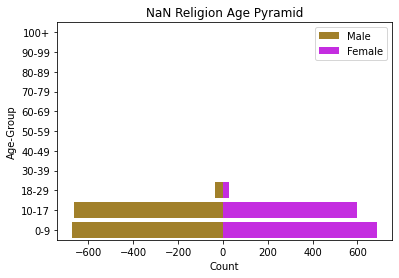

In [21]:
nan_religion=give_age_adult_pyramid(df[df['Religion'].isna()],'NaN Religion')

In [22]:
u=df[df['Religion'].isna()]
u=u[u['Age']<18]
u=u[u['Relationship to Head of House']!='None'] #to avoid children with no relation to head

In [23]:
u['Relationship to Head of House'].unique()

array(['Grandson', 'Daughter', 'Son', 'Adopted Son', 'Step-Daughter',
       'Step-Son', 'Granddaughter', 'Neice', 'Nephew', 'Adopted Daughter',
       'Head', 'Adopted Granddaughter'], dtype=object)

In [24]:
#returns the religion of the head of the house.
def give_househead_religion(i,r):
    o=give_house_detail(i,r)
    return o.loc[o[o['Relationship to Head of House']=='Head'].index.values[0],'Religion']

In [25]:
#this is to change the religion of all the young children to the head of the house religion except the kids who do not have any relation to head
for i in u.index.values:
    df.loc[i,'Religion']=give_househead_religion(i,df) 

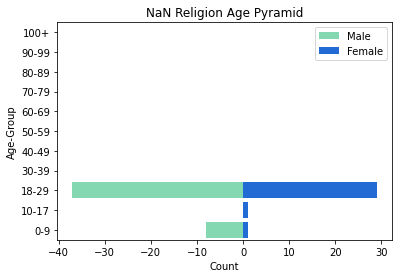

In [26]:
nan_religion=give_age_adult_pyramid(df[df['Religion'].isna()],'NaN Religion')

In [27]:
u=df[df['Religion'].isna()]

In [28]:
u['Relationship to Head of House'].unique()

array(['None', 'Head', 'Partner', 'Step-Son', 'Wife', 'Husband', 'Lodger',
       'Sibling'], dtype=object)

In [29]:
#kids staying a house without any relation to the head.
u=u[u['Age']<18]
u[u['Relationship to Head of House']=='None']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
12,5,Smith Radial,Mohamed,Hussain,8,None,NaN,Male,Student,None,NaN
765,56,Knight Road,Leonard,North,8,None,NaN,Male,Student,None,NaN
766,56,Knight Road,Frances,North,8,None,NaN,Female,Student,None,NaN
767,56,Knight Road,Malcolm,North,5,None,NaN,Male,Student,None,NaN
768,56,Knight Road,Sean,North,0,None,NaN,Male,Child,None,NaN
6236,20,Crownbird Road,Ryan,Clarke,4,None,NaN,Male,Child,None,NaN
7380,6,Watts Road,Shaun,Morris,5,None,NaN,Male,Student,None,NaN


In [30]:
give_house_detail(765,df) #seeing the house detail to search if their parents have a religion.

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
761,56,Knight Road,Amber,Curtis,84,Head,Married,Female,"Retired Engineer, mining",None,Christian
762,56,Knight Road,Marc,Curtis,86,Husband,Married,Male,"Retired Designer, multimedia",None,Christian
763,56,Knight Road,Sophie,North,27,None,Married,Female,Planning and development surveyor,None,None
764,56,Knight Road,Dominic,North,29,None,Married,Male,Commercial/residential surveyor,None,None
765,56,Knight Road,Leonard,North,8,None,NaN,Male,Student,None,NaN
766,56,Knight Road,Frances,North,8,None,NaN,Female,Student,None,NaN
767,56,Knight Road,Malcolm,North,5,None,NaN,Male,Student,None,NaN
768,56,Knight Road,Sean,North,0,None,NaN,Male,Child,None,NaN
769,56,Knight Road,Conor,Davison,48,None,Single,Male,Electronics engineer,None,None
770,56,Knight Road,Melissa,Collins,30,None,Single,Female,"Education officer, community",None,Methodist


In [31]:
#changing it to none since their parents sophie and dominic north have none religion
df.loc[765,'Religion']='None'
df.loc[766,'Religion']='None'
df.loc[767,'Religion']='None'
df.loc[768,'Religion']='None'

In [32]:
give_house_detail(12,df)

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
8,5,Smith Radial,Kim,Browne,69,Head,Married,Female,Retired Estate manager/land agent,None,Christian
9,5,Smith Radial,Oliver,Browne,69,Husband,Married,Male,"Retired Merchandiser, retail",None,None
10,5,Smith Radial,Jemma,Hussain,42,None,Married,Female,Press sub,None,Catholic
11,5,Smith Radial,Terence,Hussain,48,None,Married,Male,Research scientist (medical),None,Catholic
12,5,Smith Radial,Mohamed,Hussain,8,None,NaN,Male,Student,None,NaN


In [33]:
df.loc[12,'Religion']='Catholic'

In [34]:
give_house_detail(6236,df)

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
6232,20,Crownbird Road,Gail,Burton,72,Head,Married,Female,Retired Equities trader,None,Christian
6233,20,Crownbird Road,Denis,Burton,71,Husband,Married,Male,Retired Fast food restaurant manager,None,Christian
6234,20,Crownbird Road,Liam,Clarke,41,None,Married,Male,Pensions consultant,None,Catholic
6235,20,Crownbird Road,Charlene,Clarke,38,None,Married,Female,Garment/textile technologist,None,None
6236,20,Crownbird Road,Ryan,Clarke,4,None,NaN,Male,Child,None,NaN


In [35]:
df.loc[6236,'Religion']='None'

In [36]:
give_house_detail(7380,df)

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
7376,6,Watts Road,Dominic,Thomas,86,Head,Married,Male,Retired Fitness centre manager,None,None
7377,6,Watts Road,Margaret,Thomas,84,Wife,Married,Female,Retired Land/geomatics surveyor,None,None
7378,6,Watts Road,Ashleigh,Morris,22,None,Married,Female,University Student,None,None
7379,6,Watts Road,Glen,Morris,28,None,Married,Male,"Pharmacist, community",None,None
7380,6,Watts Road,Shaun,Morris,5,None,NaN,Male,Student,None,NaN


In [37]:
df.loc[7380,'Religion']='None'

In [38]:
u=df[df['Religion'].isna()]
u=u[u['Age']<18]
u

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1580,3,Athollbird Avenue,Jason,Murray-Richards,1,Step-Son,NaN,Male,Child,None,NaN
1581,3,Athollbird Avenue,Oliver,Murray-Richards,0,Step-Son,NaN,Male,Child,None,NaN
8805,24,Smith Points,Lynne,Tucker,17,Head,Divorced,Female,Unemployed,None,NaN


In [39]:
#changing age of lynne tucker to 18 since she is head at 17 which is a faulty data and divorced which is the only data below 18.
df.loc[8805,'Age']=18  

In [40]:
give_house_detail(1580,df)

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1579,3,Athollbird Avenue,Amanda,Richards,18,Head,Divorced,Female,Student,None,NaN
1580,3,Athollbird Avenue,Jason,Murray-Richards,1,Step-Son,NaN,Male,Child,None,NaN
1581,3,Athollbird Avenue,Oliver,Murray-Richards,0,Step-Son,NaN,Male,Child,None,NaN
1582,3,Athollbird Avenue,Rachael,Nash,63,Lodger,Single,Female,Building services engineer,None,Methodist


In [41]:
df.loc[1579,'Religion']='None'
df.loc[1580,'Religion']='None'
df.loc[1581,'Religion']='None'

In [42]:
for i in df[df['Religion'].isna()].index.values:
    df.loc[i,'Religion']='None'

In [43]:
for i in df[df['Religion']==' '].index.values:
    df.loc[i,'Religion']='None'

In [44]:
for i in df[df['Religion']=='Undecided'].index.values:
    df.loc[i,'Religion']='None'

In [45]:
for i in df[df['Religion']=='Private'].index.values:
    df.loc[i,'Religion']='None'

In [46]:
for i in df[df['Religion']=='Nope'].index.values:
    df.loc[i,'Religion']='None'

In [47]:
df[df['Surname'].str.isspace()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2496,32,Mustard Roads,Jemma,,14,Daughter,NaN,Female,Student,None,Catholic


In [48]:
give_house_detail(2496,df)

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2494,32,Mustard Roads,Janet,Robinson,36,Head,Married,Female,"Surveyor, commercial/residential",None,Catholic
2495,32,Mustard Roads,John,Robinson,39,Husband,Married,Male,Textile designer,None,Catholic
2496,32,Mustard Roads,Jemma,,14,Daughter,NaN,Female,Student,None,Catholic
2497,32,Mustard Roads,Jodie,Robinson,10,Daughter,NaN,Female,Student,None,Catholic


In [49]:
df.loc[2496,'Surname']='Robinson' #changed teh surname looking at the house detail.

## Cleaning Marital Status Column

In [50]:
df['Marital Status'].unique()

array(['Widowed', 'Single', 'Divorced', nan, 'Married'], dtype=object)

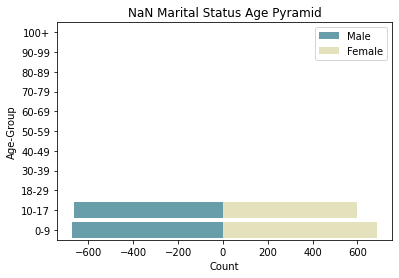

In [51]:
#checking the distribution of nan values in our dataset to approach the solution better.
nan_marital=give_age_adult_pyramid(df[df['Marital Status'].isna()],'NaN Marital Status')

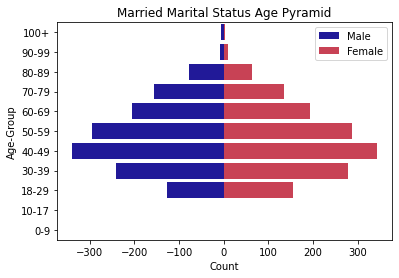

In [52]:
married=give_age_adult_pyramid(df[df['Marital Status']=='Married'],'Married Marital Status')


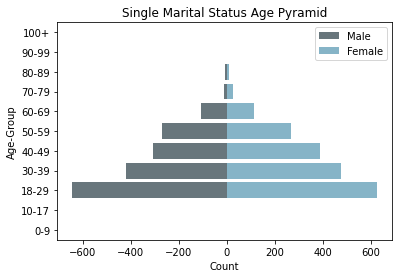

In [53]:
single=give_age_adult_pyramid(df[df['Marital Status']=='Single'],'Single Marital Status')

In [54]:
#converting the nan values to 'N/A'
for i in df[df['Marital Status'].isna()].index.values:
    df.loc[i,'Marital Status']='N/A'

In [55]:
df[df['Occupation'].str.isspace()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2156,58,Conifer Walks,Lynn,Cunningham,55,Head,Married,Female,,None,Catholic


In [56]:
df.loc[2156,'Occupation']='Unemployed'

In [57]:
df['Infirmity'].unique()

array(['None', ' ', 'Deaf', 'Mental Disability', 'Unknown Infection',
       'Disabled', 'Physical Disability', 'Blind'], dtype=object)

In [58]:
for i in df[df['Infirmity']==' '].index.values:
    df.loc[i,'Infirmity']='None'

In [59]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

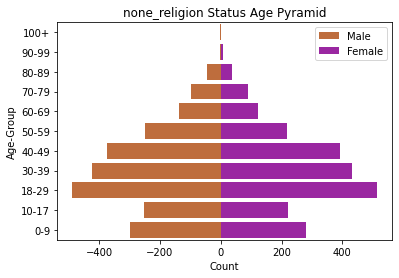

In [60]:
none_religion=give_age_adult_pyramid(df[df['Religion']=='None'],'none_religion Status')
none_religion.savefig('none_religion.png')

In [61]:
#this fuction gives the percentage graph within that age range not percentage of net. This helps in ananlysing the data age wise better.
def percentage_pyramid(v,df,title): #v is the subset-dataframe , df is the dataframe on whose basis percentage is to be calculated.
    male_age=[]
    female_age=[]
    for i in range(100,-1,-10):
        if i==20:
            i=i-2
        male_age.append(len(df[df['Gender']=='Male'][df[df['Gender']=='Male']['Age']>=i])-sum(male_age))
        female_age.append(len(df[df['Gender']=='Female'][df[df['Gender']=='Female']['Age']>=i])-sum(female_age))
    male_agev=[]
    female_agev=[]
    for i in range(100,-1,-10):
        if i==20:
            i=i-2
        male_agev.append(len(v[v['Gender']=='Male'][v[v['Gender']=='Male']['Age']>=i])-sum(male_agev))
        female_agev.append(len(v[v['Gender']=='Female'][v[v['Gender']=='Female']['Age']>=i])-sum(female_agev))
    perfem=[]
    permle=[]
    for i in range(len(male_age)):
        if male_age[i]==0:
            permle.append(0)
        else:
            permle.append((male_agev[i]/male_age[i])*100)
        if female_age[i]==0:
            perfem.append(0)
        else:
            perfem.append((female_agev[i]/female_age[i])*100)
    permle = [i * -1 for i in permle]
    AgeClass = ['100+', '90-99', '80-89', '70-79', '60-69', '50-59', '40-49', '30-39', '18-29', '10-17', '0-9']

    age_p = pd.DataFrame({'Age': ['100+', '90-99', '80-89', '70-79', '60-69', '50-59', '40-49',
    '30-39', '18-29', '10-17', '0-9'],
     'Male': permle,
     'Female': perfem})
    r = random.random()
    b = random.random()
    g = random.random()
    age_pyramid = sns.barplot(x='Male', y='Age', data=age_p, order=AgeClass,
    color=(r,g,b), label='Male')
    r = random.random()
    b = random.random()
    g = random.random()
    age_pyramid = sns.barplot(x='Female', y='Age', data=age_p, order=AgeClass,
    color=(r,g,b), label='Female')
    age_pyramid.legend()
    age_pyramid.set(xlabel="Percentage Count", ylabel="Age-Group", title = "{} Age Pyramid".format(title))
    return age_pyramid.get_figure()

## This function above generates the graph of the percentage of divorced people who are the head of the house.

### Showing that there are more female percentage of divorced heads than male married heads.
#### for eg below it shows 75 % of the divorced females of age group 40-49 are head of a house.

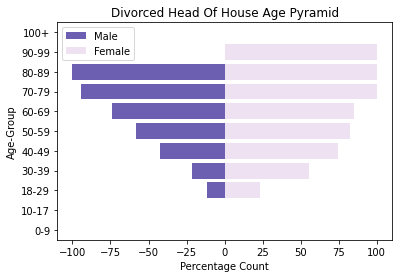

In [62]:
c=df[df['Marital Status']=='Divorced']
k=percentage_pyramid(c[c['Relationship to Head of House']=='Head'],c,'Divorced Head Of House')
k.savefig('Divorced Head Of House.png')

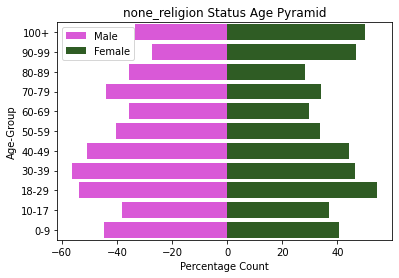

In [63]:
none_rel_per=percentage_pyramid(df[df['Religion']=='None'],df,'none_religion Status')
none_rel_per.savefig('nonerel.png')

## Creating a new column 'Emplyment Status'

In [64]:
r=df[df['Occupation']=='Unemployed']
x=r[r['Age']>64]

In [65]:
for i in x.index.values:
    df.loc[i,'Employment Status']='Retired'
    df.loc[i,'Occupation']='Retired Unemployed'

In [66]:
r=df[df['Occupation']=='Unemployed']
for i in r.index.values:
    df.loc[i,'Employment Status']='Unemployed'

In [67]:
r=df[df['Occupation']=='Child']
for i in r.index.values:
    df.loc[i,'Employment Status']='Child'

In [68]:
r=df[df['Occupation']=='Student']
for i in r.index.values:
    df.loc[i,'Employment Status']='Student'

In [69]:
r=df[df['Occupation']=='University Student']
for i in r.index.values:
    df.loc[i,'Employment Status']='Student'

In [70]:
r=df[df['Occupation'].str.find('Retired')==0]
for i in r.index.values:
    df.loc[i,'Employment Status']='Retired'

In [71]:
df['Employment Status'].fillna('Employed', inplace=True)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10610 entries, 0 to 10609
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   10610 non-null  int64 
 1   Street                         10610 non-null  object
 2   First Name                     10610 non-null  object
 3   Surname                        10610 non-null  object
 4   Age                            10610 non-null  int64 
 5   Relationship to Head of House  10610 non-null  object
 6   Marital Status                 10610 non-null  object
 7   Gender                         10610 non-null  object
 8   Occupation                     10610 non-null  object
 9   Infirmity                      10610 non-null  object
 10  Religion                       10610 non-null  object
 11  Employment Status              10610 non-null  object
dtypes: int64(2), object(10)
memory usage: 994.8+ KB


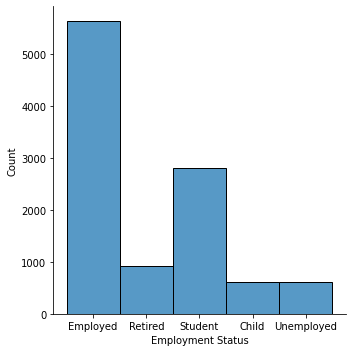

In [73]:
sns.displot(df,x='Employment Status')


In [74]:
df.drop('House Number', axis=1).groupby(by=['Marital Status']).describe()

Age                                                     
                 count       mean        std   min   25%   50%   75%    max
Marital Status                                                             
Divorced        1004.0  41.772908  16.487471  18.0  29.0  39.0  52.0   96.0
Married         2924.0  50.737346  16.687610  18.0  38.0  49.0  63.0  112.0
N/A             2615.0   9.007648   5.082933   0.0   5.0   9.0  13.0   17.0
Single          3680.0  37.557065  14.030178  18.0  26.0  36.0  48.0   91.0
Widowed          387.0  64.118863  19.357191  18.0  53.0  69.0  78.0  103.0

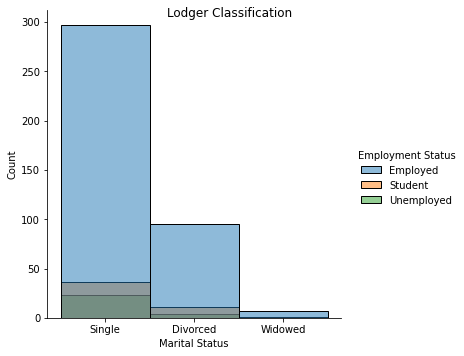

In [75]:
k=sns.displot(df[df['Relationship to Head of House']=='Lodger'],x='Marital Status',hue='Employment Status')
k.fig.suptitle('Lodger Classification')
k.savefig('Lodger Employment Status')

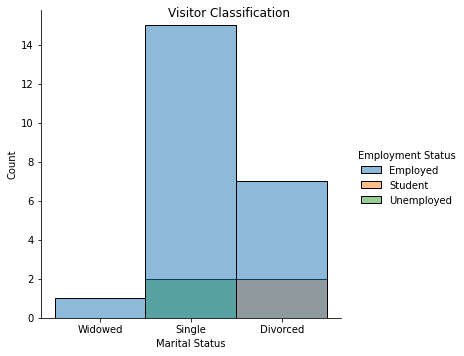

In [76]:
k=sns.displot(df[df['Relationship to Head of House']=='Visitor'],x='Marital Status',hue='Employment Status')
k.fig.suptitle('Visitor Classification')
k.savefig('Visitor Employment Status')

In [77]:
#this function counts the size of a household on the basis of the condition given appled to head of house in cases.
 #mris is the condition of a column, header is the dataframe header to which the condition belongs to,
    #d id the dataframe whose household size is to be calculated
def give_household_size(mris,header,d):
    arr=[]
    k=d[d[header]==mris]
    if header !='Infirmity' and header !='Relationship to Head of House' and mris !='Child': #just to calculate any house with that person living in like a child in a household. 
        k=k[k['Relationship to Head of House']=='Head'] #it calculates the head count of that condition.
    groupt=k.groupby(['House Number','Street'])
    m=groupt.groups.keys()
    for i in m:       
        arr.append(len(df.iloc[group.groups[i]]))
    are=np.unique(arr, return_counts=True)
    plt.plot(are[0],are[1],label=mris,marker='o',linewidth=3, markersize=5)    
    plt.xlim([0,10])
    plt.xlabel('Size Of Households')
    plt.ylabel('Count Of Households')
    plt.legend()
    plt.show
    plt.savefig('{} Household Size'.format(header))

In [78]:
def  give_household_size_grph(header,df):
    for i in df[header].unique():
        give_household_size(i,header,df)

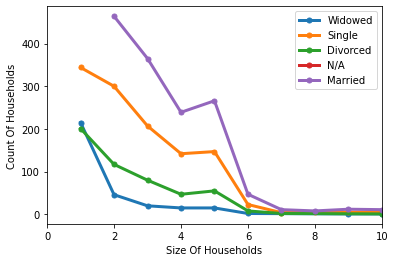

In [79]:
k=give_household_size_grph('Marital Status',df) #gives the graph of count of household vs the size of household where head is single married widowed etc.

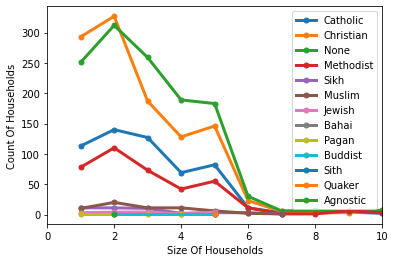

In [80]:
give_household_size_grph('Religion',df) 

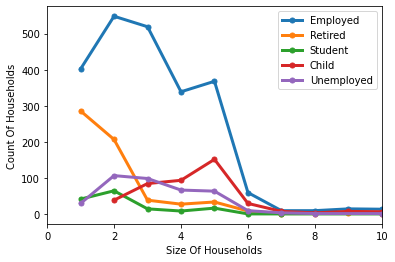

In [81]:
give_household_size_grph('Employment Status',df)

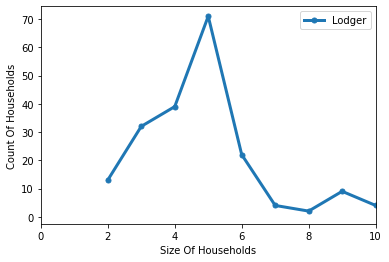

In [82]:
#for i in df['Marital Status'].unique():
give_household_size('Lodger','Relationship to Head of House',df) #household size where a lodger is present.

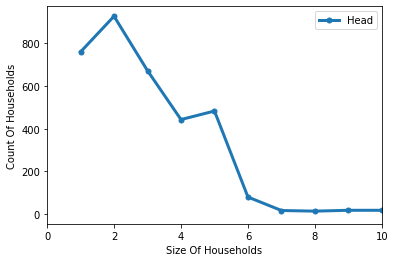

In [83]:
give_household_size('Head','Relationship to Head of House',df) #general household size.

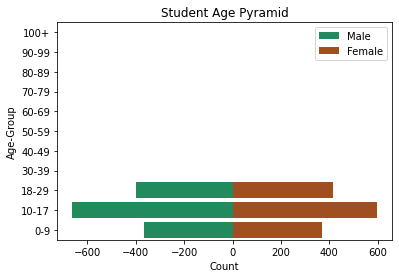

In [84]:
agepy=give_age_adult_pyramid(df[df['Employment Status']=='Student'],'Student')
agepy.savefig('Student Age')

In [85]:
#this function gives the number of households with children in the house vs age of the married/divorced/single head. if flag is true it restricts the child age to 10. 
def growth_children_with_age(age,mari_status,age_x,child_count_age,no_child_count_age,flag):
    r=df[df['Marital Status']== mari_status]
    e=r[r['Age']<age]
    j=e[e['Relationship to Head of House']=='Head']
    child=0
    no_child=0
    for i in j.index:
        q=give_house_detail(i,j)
        if flag:
            q=q[q['Age']<11]
            #checks the presence of a son daughter or adopted son granddaughter adopted son in a household to consider them in the count.
        if 'Son' in q['Relationship to Head of House'].unique() or 'Daughter' in q['Relationship to Head of House'].unique() or 'Step-Daughter' in q['Relationship to Head of House'].unique() or 'Step-Son' in q['Relationship to Head of House'].unique() or 'Adopted Daughter' in q['Relationship to Head of House'].unique() or  'Granddaughter' in q['Relationship to Head of House'].unique() or 'Adopted Son' in q['Relationship to Head of House'].unique() :
            child=child+1
        else:
            no_child=no_child+1
    child_count_age.append(child)
    no_child_count_age.append(no_child)
    age_x.append(age)
    if(age>80):
        return
    else:
        #increases the age with recursion to calculate growth. Dynamically stores it with every age 
        growth_children_with_age(age+5,mari_status,age_x,child_count_age,no_child_count_age,flag) 

In [86]:
#plots graph using above data.
#green shows household without a child and red shows with a child.
def give_growth_of_children_graph(age,mari_status,child):
    a=[]
    b=[]
    agex=[]
    growth_children_with_age(age,mari_status,agex,a,b,child)
    #pk=pd.DataFrame({'Age':age_x,'child':a,'nochild':b})
    fig, ax = plt.subplots()
    ax.plot(agex, a,label='{}  with children'.format(mari_status),color='red' ,marker='o',linewidth=2, markersize=5)
    ax.plot(agex,b ,label='{} without children'.format(mari_status),color='green',marker='o',linewidth=2, markersize=5)
    if child:
        ax.set(xlabel='Age of the Couple',ylabel='Count of household with/without child under 10')
    else:
        ax.set(xlabel='Age of the Couple',ylabel='Count of household with/without child') 
    ax.legend()
    plt.show()
    return ax.get_figure()

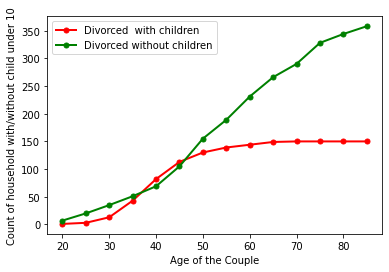

In [87]:
divorced_child_in_house=give_growth_of_children_graph(20,'Divorced',True)
divorced_child_in_house.savefig('divorced_child_in_house')

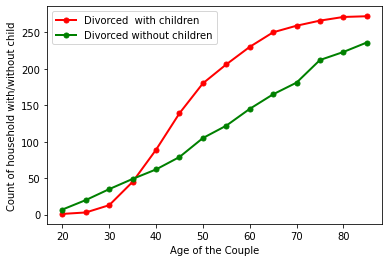

In [88]:
divorced_in_house=give_growth_of_children_graph(20,'Divorced',False)
divorced_in_house.savefig('divorced_in_house')

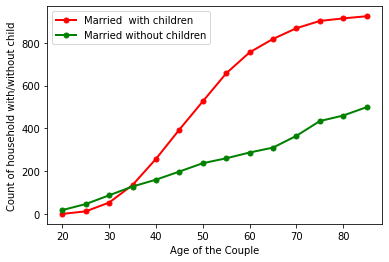

In [89]:
married_in_house=give_growth_of_children_graph(20,'Married',False)
married_in_house.savefig('married_in_house')

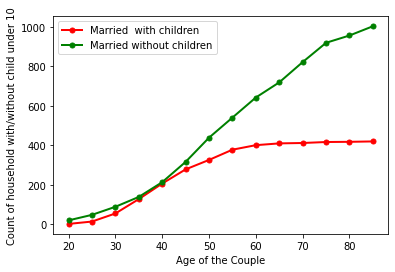

In [90]:
married_child_in_house=give_growth_of_children_graph(20,'Married',True)
married_child_in_house.savefig('married_child_in_house')

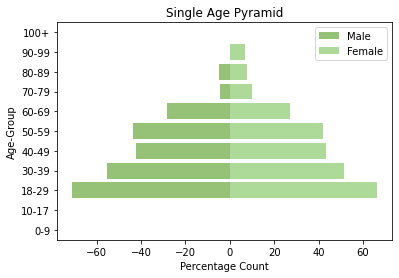

In [91]:
k=percentage_pyramid(df[df['Marital Status']=='Single'],df,'Single')
k.savefig('Single percentage')

In [92]:
#this function gives the percentage graph on the basis of net population and age distribution of a particular df respecet to a total polpulation.
def net_percentage_pyramid(d,title): # d is the conditioned dataframe
    male_age=[]
    female_age=[]
    tm=len(df[df['Gender']=='Male']) #calulates net males
    tf=len(df[df['Gender']=='Female'])# calculates net females
    for i in range(100,-1,-10):
        if i==20:
            i=i-2
        male_age.append(len(d[d['Gender']=='Male'][d[d['Gender']=='Male']['Age']>=i])-sum(male_age))
        female_age.append(len(d[d['Gender']=='Female'][d[d['Gender']=='Female']['Age']>=i])-sum(female_age))
    male_age = [(i * -100)/tm for i in male_age] #converts to percentage. 
    female_age = [(i * 100)/tf for i in female_age] #converts to percentage.
    AgeClass = ['100+', '90-99', '80-89', '70-79', '60-69', '50-59', '40-49', '30-39', '18-29', '10-17', '0-9']

    age_p = pd.DataFrame({'Age': ['100+', '90-99', '80-89', '70-79', '60-69', '50-59', '40-49',
    '30-39', '18-29', '10-17', '0-9'],
     'Male': male_age,
     'Female': female_age})
    
    r = random.random()
    b = random.random()
    g = random.random()
    age_pyramid = sns.barplot(x='Male', y='Age', data=age_p, order=AgeClass,
    color=(r,g,b), label='Male')
    r = random.random()
    b = random.random()
    g = random.random()
    age_pyramid = sns.barplot(x='Female', y='Age', data=age_p, order=AgeClass,
    color=(r,g,b), label='Female')
    age_pyramid.legend()
    age_pyramid.set(xlabel="Percentage of Total Population", ylabel="Age-Group", title = "{} Age Pyramid".format(title))
    return age_pyramid.get_figure()

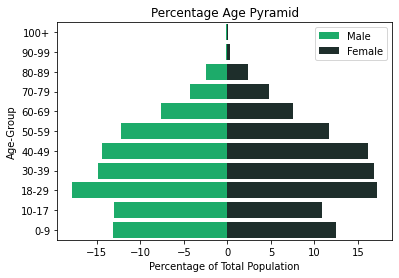

In [93]:
t=net_percentage_pyramid(df,'Percentage')
t.savefig('percentage of population')

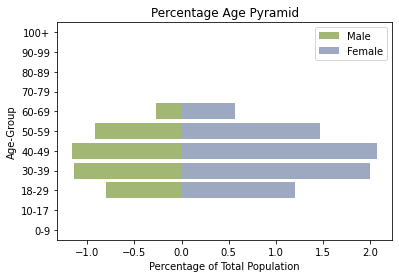

In [94]:
t=net_percentage_pyramid(df[df['Employment Status']=='Unemployed'],'Percentage')
t.savefig('percentage of unemployed population')

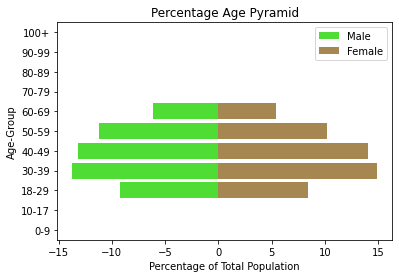

In [95]:
t=net_percentage_pyramid(df[df['Employment Status']=='Employed'],'Percentage')
t.savefig('percentage of employed population')

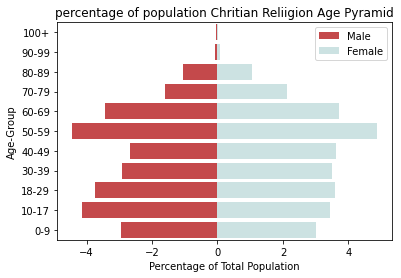

In [96]:
t=net_percentage_pyramid(df[df['Religion']=='Christian'],'percentage of population Chritian Reliigion')
t.savefig('percentage of Christian population')

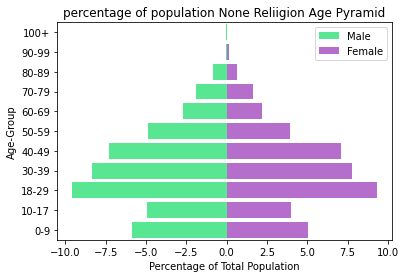

In [97]:
t=net_percentage_pyramid(df[df['Religion']=='None'],'percentage of population None Reliigion')
t.savefig('percentage of population None Reliigion')

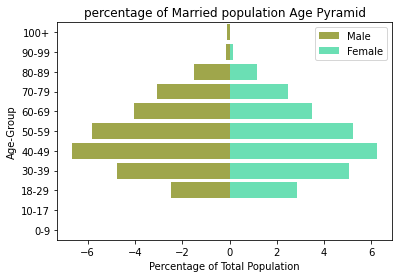

In [98]:
t=net_percentage_pyramid(df[df['Marital Status']=='Married'],'percentage of Married population')
t.savefig('percentage of married population ')

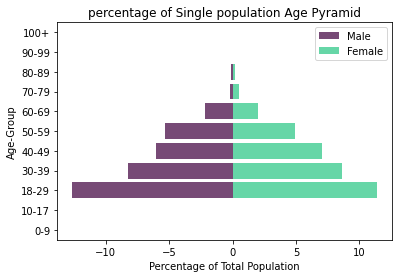

In [99]:
t=net_percentage_pyramid(df[df['Marital Status']=='Single'],'percentage of Single population')
t.savefig('percentage of Single population ')

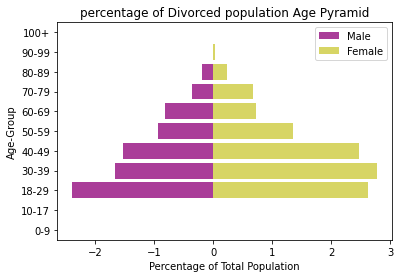

In [100]:
t=net_percentage_pyramid(df[df['Marital Status']=='Divorced'],'percentage of Divorced population')
t.savefig('percentage of Divorced population ')

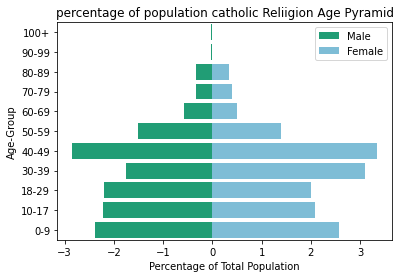

In [101]:
t=net_percentage_pyramid(df[df['Religion']=='Catholic'],'percentage of population catholic Reliigion')
t.savefig('percentage of population catholic Reliigion')